# Predict house prices 
Machine learning using linear regression
Dataset based on 1990 census data from California

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%tensorflow_version 2.x

# pd.options.display.max_rows = 10
# pd.options.display.float_format = "{:.1f}".format

##Load data

In [0]:
training_data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

training_data["median_house_value"]/=1000.0
training_data.head()

In [0]:
training_data.describe()

In [0]:
# plt.scatter(training_data.total_rooms, training_data.median_house_value); 

##Define functions for Build and train our prospective Model

In [39]:
def build_model(my_learning_rate):
  # M0 describes the topography of the simple linear regression 
  # Model, which is a single node in a single layer 

  M0 = tf.keras.layers.Dense(units=1, input_shape=(1,))

  # the model function>>
  model = tf.keras.models.Sequential(M0)

  #compile the model
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  
  return model


def train_model(model, df, feature, label, epochs, batch_size):
  history = model.fit(x=df[feature], 
                          y=df[label], 
                          batch_size = batch_size,
                          epochs=epochs)
  
  # collect model weight and bias
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  #Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # snapshot of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [40]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_data.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define function to call the model

Epoch 1/50
567/567 [==============================] - 1s 1ms/step - loss: 40842.1289 - root_mean_squared_error: 202.1362
Epoch 2/50
567/567 [==============================] - 1s 992us/step - loss: 28325.5996 - root_mean_squared_error: 168.2707
Epoch 3/50
567/567 [==============================] - 1s 1ms/step - loss: 27114.1387 - root_mean_squared_error: 164.6741
Epoch 4/50
567/567 [==============================] - 1s 1ms/step - loss: 25838.1953 - root_mean_squared_error: 160.7608
Epoch 5/50
567/567 [==============================] - 1s 979us/step - loss: 24554.2422 - root_mean_squared_error: 156.7142
Epoch 6/50
567/567 [==============================] - 1s 1ms/step - loss: 23444.2109 - root_mean_squared_error: 153.1170
Epoch 7/50
567/567 [==============================] - 1s 1ms/step - loss: 22474.6426 - root_mean_squared_error: 149.9433
Epoch 8/50
567/567 [==============================] - 1s 997us/step - loss: 21550.6289 - root_mean_squared_error: 146.8140
Epoch 9/50
567/567 [======

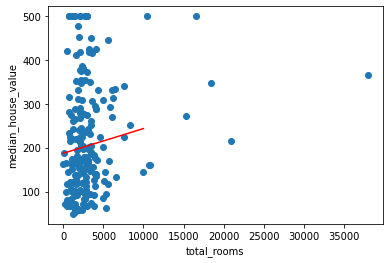

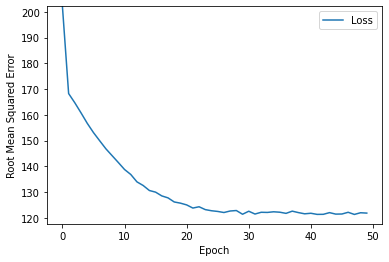

In [41]:
# The following variables are the hyperparameters.
learning_rate = 0.02
epochs = 50
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_data, 
                                         my_feature, my_label, 
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Predictions using the model 

In [0]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_data[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_data[feature][i],
                                   training_data[label][i],
                                   predicted_values[i][0] ))

In [43]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 5612     67             198
 7650     80             206
  720     86             208
 1501     73             200
 1454     66             201
 1387     74             219
 2907     82             206
  812     48             202
 4789     58             195
 1497     48             207


Epoch 1/30
1134/1134 [==============================] - 1s 908us/step - loss: 65370.4414 - root_mean_squared_error: 255.7209
Epoch 2/30
1134/1134 [==============================] - 1s 945us/step - loss: 28355.7949 - root_mean_squared_error: 168.3795
Epoch 3/30
1134/1134 [==============================] - 1s 927us/step - loss: 25710.9473 - root_mean_squared_error: 160.3764
Epoch 4/30
1134/1134 [==============================] - 1s 906us/step - loss: 23384.0332 - root_mean_squared_error: 152.9550
Epoch 5/30
1134/1134 [==============================] - 1s 908us/step - loss: 21447.4434 - root_mean_squared_error: 146.4862
Epoch 6/30
1134/1134 [==============================] - 1s 907us/step - loss: 19955.1895 - root_mean_squared_error: 141.1723
Epoch 7/30
1134/1134 [==============================] - 1s 931us/step - loss: 18626.4746 - root_mean_squared_error: 136.4398
Epoch 8/30
1134/1134 [==============================] - 1s 909us/step - loss: 17302.1094 - root_mean_squared_error: 131.5621


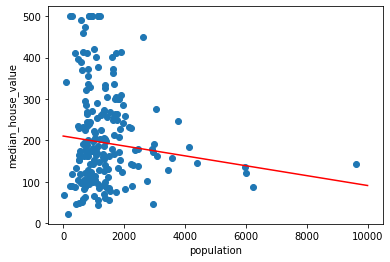

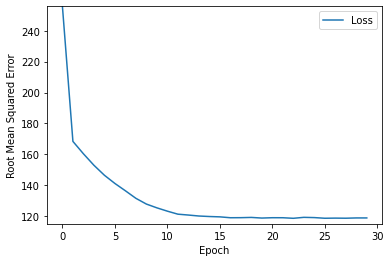

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1015     67             195
 1129     80             188
  333     86             184
  515     73             198
  624     66             191
  671     74             183
 1841     82             191
  375     48             198
 3134     58             207
  787     48             191


In [44]:
learning_rate = 0.02
epochs = 30
batch_size = 15

# Specify the feature and the label.
my_feature = "population"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_data, 
                                         my_feature, my_label, 
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

In [0]:
training_data['rooms_per_person'] = training_data.total_rooms/training_data.population
training_data.head(5)

In [0]:
learning_rate = 0.007
epochs = 20
batch_size = 10

# Specify the feature and the label.
my_feature = "median_income"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_data, 
                                         my_feature, my_label, 
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

In [0]:
# training_data.corr()